Generates $M$ sample paths of the stochastic process $X(t)=1+t+B(t)$, where $B$ denotes a standard Brownian motion. 
Incremental simulation is used.

1. Plot 10 sample paths using $t_i=\frac{i}{N}$, $i=0,\dots,N$ with $N=103$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Samples of a geometric Brownian motion at t=T are generated. The
# expectation E((K-S_1)_+) is approximated. Confidence bounds using CLT are
# computed.

M = 10**6
T = 1
S0 = 10
sigma = 0.5  # volatility
K = 11  # strike price
X = np.sqrt(T) * np.random.randn(1, M)

S = S0 * np.exp(sigma * X - 0.5 * T * (sigma**2))  # simulated stock prices
HS = np.maximum(K - S, 0)  # calculation of payoff
price = np.mean(HS)

# 95% confidence intervals
AM = price - 1.96 * np.sqrt(np.var(HS) / M)  # based on CLT
BM = price + 1.96 * np.sqrt(np.var(HS) / M)  # %

print('Estimated value:', price)
print('Confidence interval:', [AM, BM])

Estimated value: 2.6143535814611254
Confidence interval: [2.609368152501676, 2.6193390104205747]


2. Approximate $\mu:=\mathbb{E}[\exp(X_1)]$ using a Monte Carlo simulation with $M=10^6$ samples and give a 95% confidence interval. Calculate the exact value of $\mu$ and compare it with your simulation result.

$$\mathbb{E}\left[e^{\sigma B_t}\right]=\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi t}}e^{-\frac{x^2}{2t}}e^{\sigma x}dx
=\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi t}}e^{-\frac{1}{2t}(x-\sigma t)^2-\sigma^2t^2}dx
=e^{\frac{1}{2}\sigma^2 t}\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi t}}e^{-\frac{1}{2t}(x-\sigma t)^2}dx
=e^{\frac{1}{2}\sigma^2 t}$$

In [12]:
def ex43aa():
    t = 1
    N = 10**5
    M = 10
    c = 1
    sigma = 0.5
    x = np.concatenate(([np.zeros(M)], np.sqrt(t / N) * np.cumsum(np.random.randn(N, M), axis=0)), axis=0)
    drift = c * np.tile(np.arange(0, t + t / N, t / N)[:, np.newaxis], (1, M))
    x = sigma * x + drift
    x = np.exp(x)
    plt.plot(np.arange(0, t + t / N, t / N), np.column_stack((x, np.exp(drift[:, 0]))))
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()


The error is not insignificant because of the high variance of the exponential Brownian motion that is being simulated here.

3. Plot the error as a function of the number of simulation

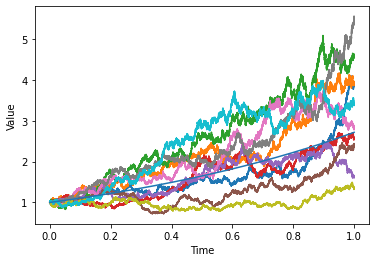

In [13]:
ex43aa()